# Movie rating prediction

In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("IMDb Movies India.csv",encoding='latin1')

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.dropna(inplace=True)

In [5]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [6]:
data.drop("Year",axis=1,inplace=True)

In [7]:
data.shape

(5659, 9)

In [8]:
data.groupby("Director")["Rating"].mean()

Director
A. Bhimsingh      6.785714
A. Jagannathan    5.833333
A. Majid          5.700000
A. Muthu          3.000000
A. Salaam         5.575000
                    ...   
Zia Sarhadi       6.366667
Ziaullah Khan     5.600000
Zoya Akhtar       6.800000
Zubair Khan       5.400000
Zunaid Memon      6.400000
Name: Rating, Length: 2431, dtype: float64

In [9]:
genre_data=data["Genre"]

In [10]:
genre_data.head(5)

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
c=CountVectorizer()

In [13]:
x_genre=c.fit_transform(genre_data)

In [14]:
genre_df=pd.DataFrame(x_genre.toarray(),columns=c.get_feature_names_out())

In [15]:
genre_df

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,music,musical,mystery,news,romance,sci,sport,thriller,war,western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5655,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5656,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5657,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf=RandomForestRegressor()

In [18]:
y=data["Rating"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_genre_training,x_genre_test,y_genre_training,y_genre_testing=train_test_split(genre_df,y,test_size=0.2)

In [21]:
y_genre_training

9405     6.8
12039    4.8
6067     3.0
7843     4.2
7522     5.2
        ... 
8193     4.9
5746     4.3
13872    7.5
3967     5.7
10861    8.4
Name: Rating, Length: 4527, dtype: float64

In [22]:
rf.fit(x_genre_training,y_genre_training)

RandomForestRegressor()

In [23]:
genre_predictions=rf.predict(x_genre_test)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
print(mean_squared_error(y_genre_testing,genre_predictions))

1.8020295883786142


In [26]:
data_copy=data.copy()

In [27]:
data_copy.head(5)

,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [28]:
data_copy.drop(["Name","Duration","Genre","Rating","Votes"],axis=1,inplace=True)

In [29]:
data_copy.head(5)

,Director,Actor 1,Actor 2,Actor 3
1,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [30]:
data_copy["cast_crew"]=data_copy.apply(lambda row:' '.join(map(str,row)),axis=1)

In [31]:
data_copy.head()

,Director,Actor 1,Actor 2,Actor 3,cast_crew
1,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Gaurav Bakshi Rasika Dugal Vivek Ghamande Arvi...
3,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Ovais Khan Prateik Ishita Raj Siddhant Kapoor
5,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Rahul Rawail Bobby Deol Aishwarya Rai Bachchan...
6,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Shoojit Sircar Jimmy Sheirgill Minissha Lamba ...
8,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Allyson Patel Yash Dave Muntazir Ahmad Kiran B...


In [32]:
data_copy["cast_crew"]=data_copy["cast_crew"].str.lower()

In [33]:
data_copy.head(5)

,Director,Actor 1,Actor 2,Actor 3,cast_crew
1,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,gaurav bakshi rasika dugal vivek ghamande arvi...
3,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,ovais khan prateik ishita raj siddhant kapoor
5,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,rahul rawail bobby deol aishwarya rai bachchan...
6,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,shoojit sircar jimmy sheirgill minissha lamba ...
8,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,allyson patel yash dave muntazir ahmad kiran b...


In [34]:
data_cast_crew=data_copy["cast_crew"]

In [35]:
c1=CountVectorizer()

In [36]:
x_cast_crew=c1.fit_transform(data_cast_crew)

In [37]:
x_cast_crew_df=pd.DataFrame(x_cast_crew.toarray(),columns=c1.get_feature_names_out())

In [38]:
x_cast_crew_df.head(5)

,aachi,aadar,aadarsh,aadhi,aadi,aadil,aadish,aaditya,aagha,aahana,...,zoa,zoe,zorabian,zoya,zubair,zubeida,zuber,zulfi,zunaid,zutshi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
rf1=RandomForestRegressor()

In [40]:
x_cast_train,x_cast_test,y_train_cast,y_test_cast=train_test_split(x_cast_crew_df,y)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr=LinearRegression()

In [43]:
lr.fit(x_cast_train,y_train_cast)

LinearRegression()

In [44]:
cast_crew_predictions=lr.predict(x_cast_test)

In [47]:
print(mean_squared_error(cast_crew_predictions,y_test_cast))

3.5364209019424304e+26


In [48]:
import matplotlib.pyplot as plt

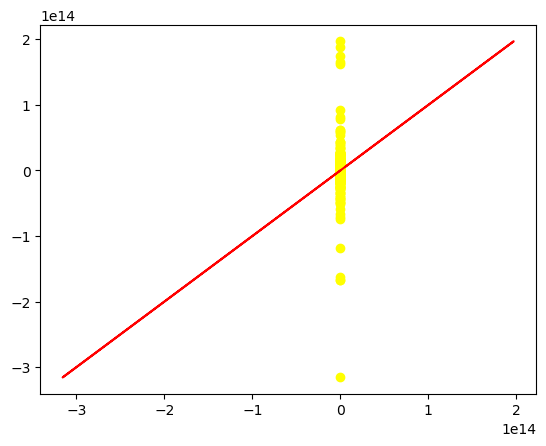

In [50]:
plt.scatter(y_test_cast,cast_crew_predictions,color="yellow")
plt.plot(cast_crew_predictions,cast_crew_predictions,color="red")

# AUTOMATED FUNCTION

In [54]:
def cast_crew_predict(x,y,ml_model1,ml_model2):
    x_train,x_test,y_train,y_test=train_test_split(x,y)
    ml_model1.fit(x_train,y_train)
    ml_model2.fit(x_test,y_test)
    predictions1=ml_model1.predict(x_test)
    predictions2=ml_model2.predict(x_test)
    print("The mse of ml_model1 is",mean_squared_error(predictions1,y_test))
    print("The mse of ml_model2 is",mean_squared_error(predictions2,y_test))
    

In [55]:
cast_crew_predict(x_cast_crew_df,y,lr,rf)

The mse of ml_model1 is 1.9322513608959195e+26
The mse of ml_model2 is 0.24346945262937553
